In [1]:
#bibliotecas
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
def hist_exc(cur_pairs):
    """
    Baixa o histórico das taxas de câmbio para os pares de moedas especificados.

    Parâmetros:
    - pares_moedas: lista de strings com os pares de moedas no formato 'USD/XXX'.
    - dias_atras: número de dias atrás a partir de hoje para a data de início.

    Retorna:
    - Um dicionário com os dados de cada par de moedas.
    """
    # Definir datas de início e fim
    end_date = dt.datetime.today()
    start_date = '2010-01-01'

    exc_data = {}

    for par in cur_pairs:
        base, cotacao = par.split('/')
        
        # Tratamento especial para USD/EUR, pois o ticker é 'EURUSD=X' e precisamos inverter a taxa
        if par == 'USD/EUR':
            ticker = 'EURUSD=X'
            precisa_inverter = True
        else:
            ticker = f'{cotacao}=X'
            precisa_inverter = False

        # Baixar os dados
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Verificar se os dados foram baixados com sucesso
        if data.empty:
            print(f"Não foi possível baixar os dados para o par {par}.")
            continue

        # Inverter a taxa se necessário
        if precisa_inverter:
            data['Open'] = 1 / data['Open']
            data['High'] = 1 / data['High']
            data['Low'] = 1 / data['Low']
            data['Close'] = 1 / data['Close']
            data['Adj Close'] = 1 / data['Adj Close']

        # Armazenar os dados no dicionário
        exc_data[par] = data

    return exc_data

# Exemplo de uso da função
pares_moedas = ['USD/BRL', 'USD/JPY', 'USD/EUR', 'USD/MXN']
dados = hist_exc(pares_moedas)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


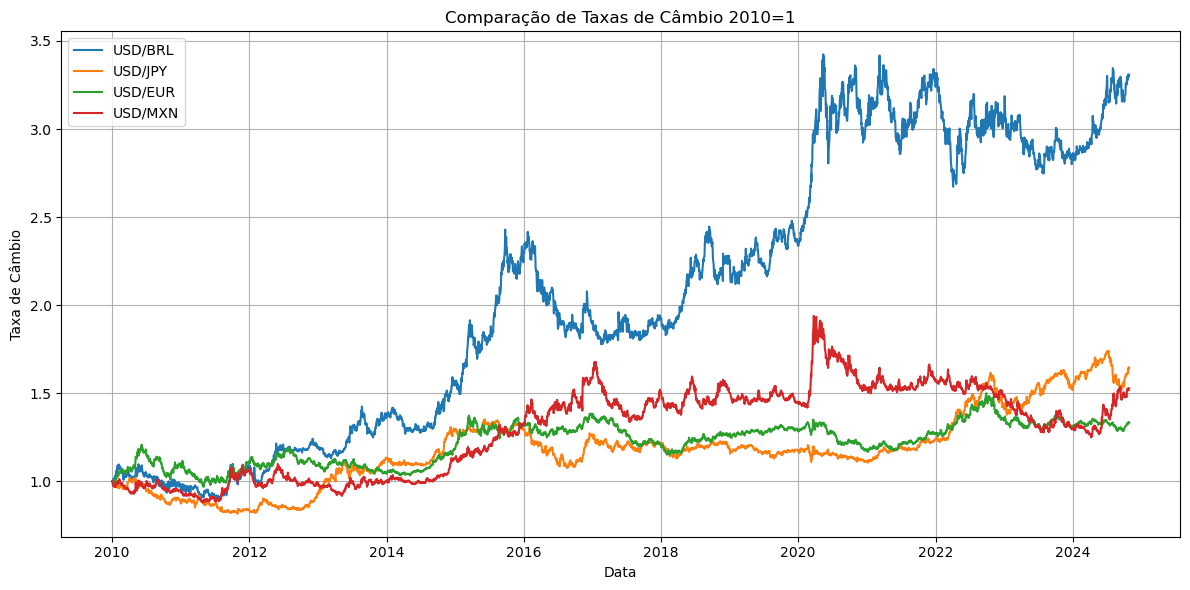

In [3]:
# Normalizar e plotar os dados
plt.figure(figsize=(12, 6))

for par in pares_moedas:
    if par in dados:
        # Selecionar a coluna de fechamento ajustado
        data_par = dados[par]['Adj Close']
        
        # Normalizar dividindo pelo primeiro valor não nulo
        data_normalizada = data_par / data_par.iloc[0]
        
        # Plotar a série normalizada
        plt.plot(data_normalizada.index, data_normalizada, label=par)

# Configurar o gráfico
plt.title('Comparação de Taxas de Câmbio 2010=1')
plt.xlabel('Data')
plt.ylabel('Taxa de Câmbio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()